교수님께서 기존 데이터셋 (A)을 이용하여 모델링을 진행하고, 나중에 기존 데이터셋을 변경한 데이터셋(B)의 성능을 비교하라고 하셨습니다.

그래서 기존 데이터셋 (A: 신규노선 항공운임예측, 독일 신용평가 자료 둘 다 포함) Phase 1 도 진행하고 변경된 데이터셋 (B: 교수님께서 주신 새로운 신규노선 항공운임예측, 독일 신용평가 자료 둘 다 포함) Phase 1 도 진행했습니다! 이 점 참고 부탁드립니다.

# 1. 기존 데이터셋 Phase 1-프로젝트 준비 및 탐색
# 신규노선 항공운임예측

# **1. 프로젝트 정의 및 목표 설정**

🔷 1. 프로젝트 정의 및 목표 설정 (Project Definition & Goal Setting)

● 문제 정의 (Problem Definition)

본 프로젝트의 목표는 항공 운임(Airfare)을 예측하는 회귀 모델을 개발하는 것이다. 사용자는 항공편의 출발지, 도착지, 경유 여부, 항공사 등의 정보를 기반으로 해당 항공권의 가격을 예측하고자 한다. 이는 가격 책정 전략 수립, 경쟁사 분석, 고객 맞춤형 요금 제안 등에 활용될 수 있다.



● 데이터 정의 (Data Definition)

본 프로젝트에서는 제공된 Airfares_simple_garbled.csv 데이터를 사용한다. 해당 데이터는 항공 운임에 영향을 줄 수 있는 다양한 변수(출발지, 도착지, 항공사, 여행일, 경유 여부 등)와 실제 운임 정보를 포함하고 있으며, 데이터 출처는 항공권 가격 조사에서 수집된 것으로 추정된다. 다만, 원본 데이터에는 일부 오류 혹은 비정상적인 값이 포함되어 있어 추가적인 정제 작업이 필요하다.



● 성공 지표 설정 (Success Metrics)

예측 모델의 성능 평가는 Root Mean Squared Error (RMSE) 와 Mean Absolute Error (MAE) 를 기준으로 한다. 다음과 같은 성능 기준을 목표로 설정한다:

RMSE: 40 이하

MAE: 30 이하

이는 항공권 가격 예측의 오차가 실제 비즈니스에 유의미하게 작용할 수 있는 수준을 고려한 수치이다.




● 기대 효과 및 제약 조건 (Expected Impact & Constraints)

기대 효과:

-고객에게 보다 정확한 예상 항공권 가격을 제공하여 구매 결정 지원

-항공사 또는 여행 플랫폼에서 가격 예측 기반 맞춤 추천 가능

-경쟁사 요금 비교 및 가격 전략 수립에 활용



제약 조건:

-데이터에 포함된 결측치, 오류값, 텍스트 기반 범주형 변수 처리의 난이도

-모델 학습 및 평가에 사용할 수 있는 리소스(시간, 계산 자원) 제한

-비정형 데이터 전처리에 대한 해석 및 판단 필요



# **2. 데이터 수집 및 로드**

In [1]:
# 1. 파일 업로드
from google.colab import files
uploaded = files.upload()

# 2. Pandas로 데이터 읽기
import pandas as pd

# 업로드한 파일명을 정확히 입력해야 함 (예: 'Airfares_simple_garbled.csv')
df = pd.read_csv('Airfares_simple_garbled.csv')

# 3. 기본 정보 확인
print("✅ 데이터 shape (행, 열):", df.shape)
print("\n✅ 컬럼명:")
print(df.columns.tolist())
print("\n✅ 데이터 타입:")
print(df.dtypes)

# 4. 데이터 미리보기
print("\n✅ 데이터 상위 5행:")
print(df.head())


Saving Airfares_simple_garbled.csv to Airfares_simple_garbled.csv
✅ 데이터 shape (행, 열): (648, 18)

✅ 컬럼명:
['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE', 'DISTANCE', 'PAX', 'FARE']

✅ 데이터 타입:
S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE    float64
PAX         float64
FARE        float64
dtype: object

✅ 데이터 상위 5행:
  S_CODE                  S_CITY E_CODE                  E_CITY  COUPON  NEW  \
0      *  Dallas/Fort Worth   TX      *  Amarillo            TX    1.00    3   
1      *  Atlanta             GA      *  Baltimore/Wash Intl MD    1.06    3   
2      *  Boston              MA      *  Baltimore/Wash Intl MD    1.06    3   
3    ORD  

업로드한 Airfares_simple_garbled.csv 파일은 총 648개의 행과 18개의 열로 구성되어 있으며, 항공편 정보와 운임 관련 데이터를 포함하고 있다.

주요 변수는 출발지/도착지 정보(S_CITY, E_CITY), 경유 수(COUPON), 항공사 여부(SW), 거리(DISTANCE), 여객 수(PAX), 그리고 예측 대상인 항공 요금(FARE) 등이다. 데이터 타입은 문자열(object), 정수(int64), 실수(float64) 등으로 구성되어 있다.



# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [2]:
# 수치형 변수 요약 통계
df.describe()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,648.000000,648.000000,648.000000,616.000000,615.000000,6.480000e+02,6.480000e+02,617.000000,617.000000,648.000000
mean,1.201944,2.756173,4443.943380,27742.331169,27545.308943,4.561558e+06,3.190555e+06,1047.669368,12657.116694,158.158827
std,0.202933,0.755685,1722.601245,3590.301994,4609.631624,3.015805e+06,2.730106e+06,1267.277578,12917.285290,82.132518
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,-234.150000
25%,1.040000,3.000000,3095.872500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,450.000000,5275.000000,105.340000
50%,1.150000,3.000000,4208.185000,27994.000000,26409.000000,3.532657e+06,2.195215e+06,844.000000,7785.000000,143.440000
75%,1.300000,3.000000,5485.617500,29260.000000,31981.000000,7.830332e+06,4.549784e+06,1389.000000,14005.000000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,24440.000000,73892.000000,402.020000


● 수치형 데이터 요약


항공 운임 예측에 활용되는 수치형 변수들의 평균, 중앙값, 표준편차, 최소/최대값, 사분위수를 확인하였다. 예를 들어, 운임(FARE)의 평균은 약 158.2, 최소값은 -234.15, 최대값은 402.02로, 일부 음수 운임 값이 존재하여 이상치 또는 데이터 오류 가능성이 있음이 관찰되었다.

In [3]:
# 범주형 변수의 고유값과 빈도수 출력
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n📌 {col} - Unique Values: {df[col].nunique()}")
    print(df[col].value_counts())



📌 S_CODE - Unique Values: 8
S_CODE
*      462
ORD     45
MDW     45
EWR     31
JFK     30
LGA     29
IAD      3
DCA      3
Name: count, dtype: int64

📌 S_CITY - Unique Values: 64
S_CITY
New York/Newark     NY    89
Chicago             IL    86
Atlanta             GA    40
Dallas/Fort Worth   TX    38
Los Angeles         CA    34
                          ..
san francisco       ca     1
Anchorage           AK     1
Pittsburgh          PA     1
new orleans         la     1
phoenix             az     1
Name: count, Length: 64, dtype: int64

📌 E_CODE - Unique Values: 8
E_CODE
*      509
DCA     28
IAD     27
JFK     26
EWR     25
LGA     25
MDW      4
ORD      4
Name: count, dtype: int64

📌 E_CITY - Unique Values: 81
E_CITY
New York/Newark     NY        73
Washington          DC        55
Phoenix             AZ        24
Orlando             FL        23
Baltimore/Wash Intl MD        23
                              ..
  San Francisco       CA       1
Spokane             WA         1
  San

● 범주형 변수 요약


출발지 코드(S_CODE), 도시(S_CITY), 항공사 여부(SW) 등의 범주형 변수는 다수의 고유값을 가지며, 일부 값은 대소문자 불일치 등 데이터 정제 필요성이 발견되었다. 예를 들어, VACATION 변수는 'No', 'NO' 등으로 혼용되어 있음.

In [4]:
# 결측치 개수와 비율 확인
missing = df.isnull().sum()
missing_ratio = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_ratio})
missing_df[missing_df['Missing Count'] > 0]


,Missing Count,Missing Ratio (%)
S_INCOME,32,4.938272
E_INCOME,33,5.092593
DISTANCE,31,4.783951
PAX,31,4.783951


● 결측치 확인


총 648개의 샘플 중 일부 변수(S_INCOME, E_INCOME, DISTANCE, PAX)에서 결측치가 존재하며, 결측 비율은 약 4.8% 내외로 확인되었다. 분석 전 적절한 결측값 처리(제거 또는 대체)가 필요하다.

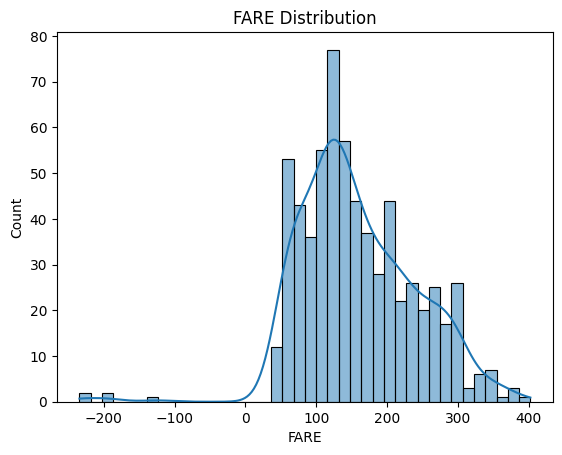

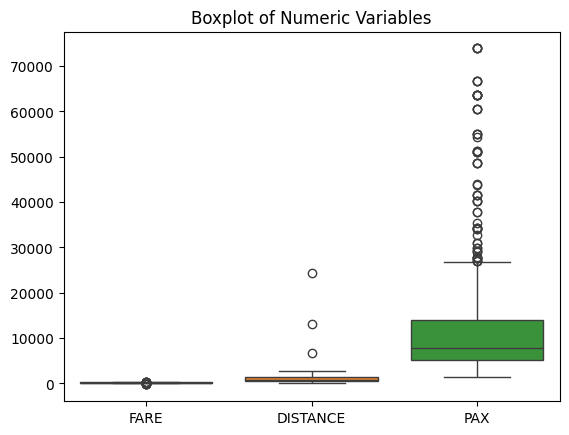

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 대표 수치형 변수 시각화 (히스토그램 + KDE)
sns.histplot(df['FARE'], bins=40, kde=True)
plt.title("FARE Distribution")
plt.show()

# 박스플롯 (다변수 비교 가능)
sns.boxplot(data=df[['FARE', 'DISTANCE', 'PAX']])
plt.title("Boxplot of Numeric Variables")
plt.show()


● 이상치 탐색


FARE, DISTANCE, PAX 등 주요 변수에 대한 박스플롯을 통해 극단적인 이상값이 존재함을 확인하였다. 특히 FARE 변수에서 음수 값이 존재하는 점은 비정상 데이터로 간주되어야 하며, 후속 전처리에서 필터링이 필요하다.

In [6]:
# 왜도와 첨도 수치 확인
print("Skewness (왜도):", df['FARE'].skew())
print("Kurtosis (첨도):", df['FARE'].kurt())


Skewness (왜도): -0.061571389535982075
Kurtosis (첨도): 1.8833914477955025


● 타겟 변수 분석 (FARE)


타겟 변수인 FARE는 좌측으로 꼬리가 긴 분포(왼쪽 왜도)를 보이며, 분포가 완전히 정규적이지는 않다. KDE 플롯 및 히스토그램 분석 결과, 대부분의 운임이 50~250 사이에 분포하며, 소수의 고운임 및 음수 운임이 존재한다.

# 1. 기존 데이터셋 Phase 1-프로젝트 준비 및 탐색


# 독일 신용평가 자료


# **1. 프로젝트 정의 및 목표 설정**

🔷 1. 프로젝트 정의 및 목표 설정 (Project Definition & Goal Setting)


● 문제 정의 (Problem Definition)

본 프로젝트의 목표는 신용 대출 신청자의 데이터를 기반으로, 신용 등급(Good/Bad)을 예측하는 분류 모델을 개발하는 것이다. 이는 금융 기관이 고객의 신용도를 사전에 평가하여 연체 위험을 줄이고, 보다 합리적인 대출 승인 여부를 판단하는 데 기여할 수 있다.



● 데이터 정의 (Data Definition)


분석에 사용되는 데이터는 **GermanCredit.csv**로, 독일 신용 데이터셋(German Credit Data)으로 알려진 공개 데이터이다. 해당 데이터는 개인의 대출 신청 내역, 직업, 소득, 자산, 결혼 여부, 계좌 정보 등의 변수와 **신용 등급(Label)**을 포함하고 있다. 이 데이터는 머신러닝 기반 신용평가 모델의 교육 및 검증용으로 널리 활용된다.



● 성공 지표 설정 (Success Metrics)


모델 성능 평가는 다음과 같은 분류 지표를 중심으로 설정한다:

정확도 (Accuracy): 80% 이상

정밀도(Precision), 재현율(Recall), F1 Score: 특히 클래스 불균형 문제가 있을 수 있으므로 F1 Score ≥ 0.75를 주요 기준으로 삼는다.

ROC-AUC 점수도 보조 지표로 활용한다.



● 기대 효과 및 제약 조건 (Expected Impact & Constraints)


기대 효과:


대출 리스크를 사전에 예측하여 금융 사고 감소

자동화된 고객 신용 평가 시스템 개발 기반 확보






제약 조건:


클래스 간 불균형(Bad 등급이 적을 가능성)

일부 범주형 변수의 정제 필요성

실제 현업 적용 시 법적/윤리적 문제 고려 필요

익명화된 변수명으로 인해 도메인 해석이 제한적일 수 있음

# **2. 데이터 수집 및 로드**

In [7]:
# 1. pandas 불러오기
import pandas as pd

# 2. CSV 파일 불러오기 (파일 업로드 후 파일명 정확히 기입)
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('GermanCredit.csv')

# 3. 데이터 기본 구조 확인
print("✅ 데이터 형태 (행, 열):", df.shape)
print("\n✅ 컬럼명:")
print(df.columns.tolist())
print("\n✅ 데이터 타입:")
print(df.dtypes)

# 4. 상위 5개 행 미리보기
print("\n✅ 데이터 일부 미리보기:")
print(df.head())


Saving GermanCredit.csv to GermanCredit.csv
✅ 데이터 형태 (행, 열): (1000, 32)

✅ 컬럼명:
['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN', 'RESPONSE']

✅ 데이터 타입:
OBS#                int64
CHK_ACCT            int64
DURATION            int64
HISTORY             int64
NEW_CAR             int64
USED_CAR            int64
FURNITURE           int64
RADIO/TV            int64
EDUCATION           int64
RETRAINING          int64
AMOUNT              int64
SAV_ACCT            int64
EMPLOYMENT          int64
INSTALL_RATE        int64
MALE_DIV            int64
MALE_SINGLE         int64
MALE_MAR_or_WID     int64
CO-APPLICANT        int64
GUARANTOR           int

GermanCredit.csv 파일은 Pandas 라이브러리를 사용해 불러왔으며, 총 1,000개의 행과 32개의 열로 구성되어 있다.

모든 변수는 정수형(int64)으로 되어 있으며, 이미 숫자로 인코딩된 범주형 변수들이 포함되어 있다.

데이터는 대출 신청자에 대한 다양한 특성과 신용 등급(RESPONSE 변수)을 포함하고 있으며, 신용 등급은 0 = Bad, 1 = Good으로 구분된다.

# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [8]:
# ✅ 1. 수치형 데이터 요약 (기술 통계량)
df.describe()


,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,288.819436,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,500.500000,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,750.250000,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


describe() 함수를 통해 수치형 변수들의 평균, 중앙값, 표준편차, 최소/최대값, 사분위수를 확인하였다.


예를 들어, AMOUNT 변수는 평균 약 3,271, 최대값 18,424로 확인되며 분포가 넓음을 알 수 있다.

In [9]:
# ✅ 2. 범주형 변수 분포 확인 (고유값 + 빈도수)
categorical_cols = df.select_dtypes(include='int64').columns
for col in categorical_cols:
    unique_vals = df[col].nunique()
    if unique_vals <= 10:
        print(f"\n📌 {col} (고유값 {unique_vals}개)")
        print(df[col].value_counts())



📌 CHK_ACCT (고유값 4개)
CHK_ACCT
3    394
0    274
1    269
2     63
Name: count, dtype: int64

📌 HISTORY (고유값 5개)
HISTORY
2    530
4    293
3     88
1     49
0     40
Name: count, dtype: int64

📌 NEW_CAR (고유값 2개)
NEW_CAR
0    766
1    234
Name: count, dtype: int64

📌 USED_CAR (고유값 2개)
USED_CAR
0    897
1    103
Name: count, dtype: int64

📌 FURNITURE (고유값 2개)
FURNITURE
0    819
1    181
Name: count, dtype: int64

📌 RADIO/TV (고유값 2개)
RADIO/TV
0    720
1    280
Name: count, dtype: int64

📌 EDUCATION (고유값 2개)
EDUCATION
0    950
1     50
Name: count, dtype: int64

📌 RETRAINING (고유값 2개)
RETRAINING
0    903
1     97
Name: count, dtype: int64

📌 SAV_ACCT (고유값 5개)
SAV_ACCT
0    603
4    183
1    103
2     63
3     48
Name: count, dtype: int64

📌 EMPLOYMENT (고유값 5개)
EMPLOYMENT
2    339
4    253
3    174
1    172
0     62
Name: count, dtype: int64

📌 INSTALL_RATE (고유값 4개)
INSTALL_RATE
4    476
2    231
3    157
1    136
Name: count, dtype: int64

📌 MALE_DIV (고유값 2개)
MALE_DIV
0    950
1     50
Name:

고유값 개수가 10개 이하인 변수를 범주형 변수로 간주하고 각 변수의 빈도수를 확인하였다.


예를 들어, CHK_ACCT 변수는 총 4개의 범주로 구성되어 있으며, 특정 값에 편중되어 있을 수 있다.

In [10]:
# ✅ 3. 결측치 확인
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_percent})
missing_df[missing_df['Missing Count'] > 0]


,Missing Count,Missing Ratio (%)


전체 데이터셋에 대해 결측치 개수와 비율을 확인한 결과, 결측치는 존재하지 않는 것으로 나타났다.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

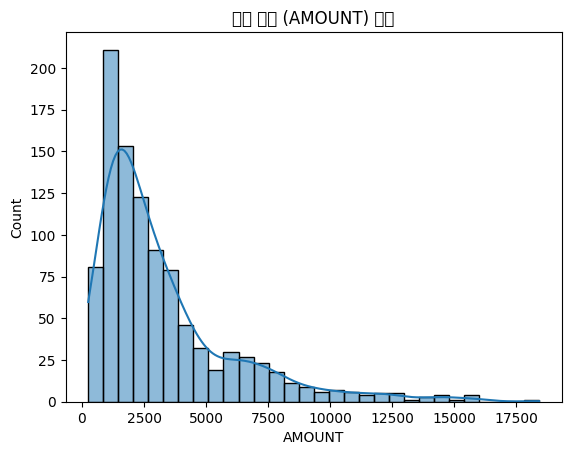

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

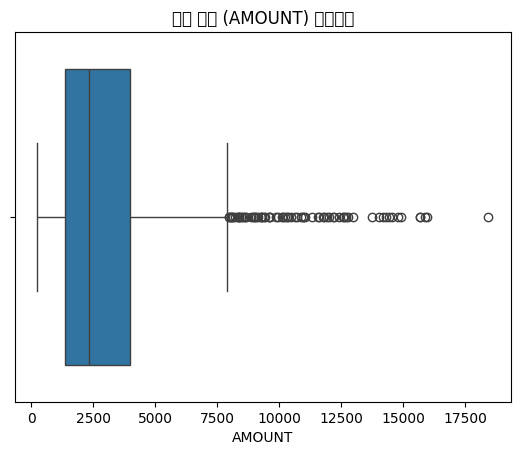

In [11]:
# ✅ 4. 이상치 탐색 (히스토그램 + 박스플롯)
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램
sns.histplot(df['AMOUNT'], bins=30, kde=True)
plt.title("대출 금액 (AMOUNT) 분포")
plt.show()

# 박스플롯
sns.boxplot(x=df['AMOUNT'])
plt.title("대출 금액 (AMOUNT) 박스플롯")
plt.show()


AMOUNT 변수에 대한 분포를 시각화한 결과, 일부 극단적인 고액 대출 값이 존재함을 확인할 수 있다.

이는 모델 학습 시 이상치로 작용할 수 있으므로 주의가 필요하다.

RESPONSE
1    700
0    300
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


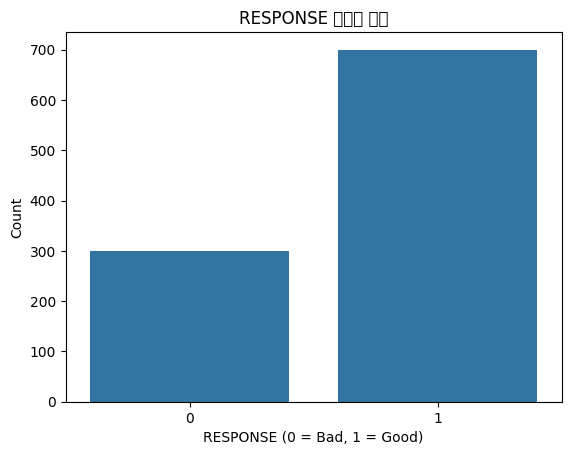

In [12]:
# ✅ 5. 타겟 변수 분석 (RESPONSE)
print(df['RESPONSE'].value_counts())
sns.countplot(x='RESPONSE', data=df)
plt.title("RESPONSE 클래스 분포")
plt.xlabel("RESPONSE (0 = Bad, 1 = Good)")
plt.ylabel("Count")
plt.show()


타겟 변수 RESPONSE는 0 (Bad), 1 (Good)으로 구성된 이진 분류 문제이며, Good 등급이 약 70%를 차지한다.


클래스 불균형이 존재하므로 향후 모델 성능 평가 시 F1 Score 등의 지표를 활용할 필요가 있다.

-----------------------------------------------------------------------------


여기까지가 기존 데이터셋 Phase 1 프로젝트 준비 및 탐색이었고 밑으로는 교수님께서 새로 주신 변경된 데이터셋 Phase 1 입니다!!

# 2. 변경된 데이터셋 Phase 1 -프로젝트 준비 및 탐색



# 신규노선 항공운임예측


# **1. 프로젝트 정의 및 목표 설정**

변경된 데이터셋 이름과 기존 데이터셋 이름이 똑같아서 변경된 데이터셋은 Airfares_simple_garbled2 라고 2를 붙여서 둘을 구분했습니다!



● 문제 정의 (Problem Definition)


본 프로젝트의 목적은 항공편 관련 정보(출발지, 도착지, 거리, 경유 수, 인구 수, 소득 등)를 바탕으로, 항공 운임(FARE)을 예측하는 회귀 모델을 개발하는 것이다.


해당 예측 모델은 향후 항공사나 여행 플랫폼에서 가격 책정 전략, 수요 예측, 사용자 맞춤 요금 제안 등에 활용될 수 있다.



● 데이터 정의 (Data Definition)


프로젝트에는 두 가지 버전의 데이터셋이 사용된다.

첫 번째는 Airfares_simple_garbled.csv로, 원본 데이터를 기반으로 한다.

두 번째는 Airfares_simple_garbled2.csv로, 전처리나 변형이 가해진 수정된 데이터셋이다.


각 데이터셋은 약 600여 개의 항공편 샘플과 18개 변수로 구성되어 있으며, 주요 변수에는 거리(DISTANCE), 여객 수(PAX), 출도착지 인구 및 소득(S_POP, E_INCOME), 경유 횟수(COUPON), Southwest 항공 여부(SW) 등이 포함되어 있다.


● 성공 지표 설정 (Success Metrics)

예측 모델의 성능 평가는 다음 지표를 기준으로 한다:

Root Mean Squared Error (RMSE) ≤ 40

Mean Absolute Error (MAE) ≤ 30
이는 항공 요금 예측이 비즈니스 의사결정에 의미 있는 정확도로 기여할 수 있는 수준으로 설정한 기준이다.



● 기대 효과 및 제약 조건 (Expected Impact & Constraints)

기대 효과:


고객에게 더 정확한 운임 정보 제공 가능

항공사 또는 플랫폼의 가격 전략 수립에 활용

경유 여부, 항공사, 거리 등 다양한 요인이 요금에 미치는 영향 분석 가능



제약 조건:


일부 변수의 데이터 오류 또는 결측치 존재

비정형 범주형 변수 처리 필요 (S_CITY, SW, VACATION 등)

수정된 데이터셋과의 공정한 비교를 위해 동일한 모델 구조 및 평가 방식 유지 필요

학습 데이터의 크기가 비교적 작아 복잡한 모델 적용에 제약이 있음

# **2. 데이터 수집 및 로드**

In [13]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()

# Pandas로 데이터 불러오기
import pandas as pd

df2 = pd.read_csv('Airfares_simple_garbled2.csv')


# 데이터 기본 정보 확인
print("✅ 데이터 형태 (행, 열):", df2.shape)
print("\n✅ 컬럼명:")
print(df2.columns.tolist())
print("\n✅ 데이터 타입:")
print(df2.dtypes)

# 상위 5행 미리보기
df2.head()


Saving Airfares_simple_garbled2.csv to Airfares_simple_garbled2.csv
✅ 데이터 형태 (행, 열): (648, 18)

✅ 컬럼명:
['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE', 'DISTANCE', 'PAX', 'FARE']

✅ 데이터 타입:
S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE    float64
PAX         float64
FARE        float64
dtype: object


,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312.0,7864.0,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576.0,8820.0,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,NaN,29838.0,5787293,7145897,Free,Free,364.0,6452.0,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612.0,25144.0,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612.0,25144.0,85.47


변경된 데이터셋은 약 648개의 행과 18개의 열로 구성되어 있으며, 기존 데이터셋과 구조가 유사하다.


대부분의 변수는 수치형(float64, int64)과 범주형(object)으로 구성되어 있으며, FARE는 예측 대상인 연속형 변수이다.

# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [14]:
# ✅ 수치형 데이터 기술 통계량 확인
df2.describe()


,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,648.000000,648.000000,648.000000,616.000000,615.000000,6.480000e+02,6.480000e+02,617.000000,617.000000,648.000000
mean,1.201944,2.756173,4443.943380,27742.331169,27545.308943,4.561558e+06,3.190555e+06,1047.669368,12657.116694,158.158827
std,0.202933,0.755685,1722.601245,3590.301994,4609.631624,3.015805e+06,2.730106e+06,1267.277578,12917.285290,82.132518
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,-234.150000
25%,1.040000,3.000000,3095.872500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,450.000000,5275.000000,105.340000
50%,1.150000,3.000000,4208.185000,27994.000000,26409.000000,3.532657e+06,2.195215e+06,844.000000,7785.000000,143.440000
75%,1.300000,3.000000,5485.617500,29260.000000,31981.000000,7.830332e+06,4.549784e+06,1389.000000,14005.000000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,24440.000000,73892.000000,402.020000


FARE 변수는 평균 약 158, 최소값은 -234, 최대값은 402로 나타났으며, 음수 운임이 존재해 데이터 오류 가능성이 있다.

DISTANCE와 PAX도 최대값 기준으로 이상치가 포함되어 있을 수 있다.

In [15]:
# ✅ 범주형 변수: 고유값 및 빈도수 확인
categorical_cols = df2.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n📌 {col} (고유값 {df2[col].nunique()}개)")
    print(df2[col].value_counts())



📌 S_CODE (고유값 8개)
S_CODE
*      462
ORD     45
MDW     45
EWR     31
JFK     30
LGA     29
IAD      3
DCA      3
Name: count, dtype: int64

📌 S_CITY (고유값 64개)
S_CITY
New York/Newark     NY    89
Chicago             IL    86
Atlanta             GA    40
Dallas/Fort Worth   TX    38
Los Angeles         CA    34
                          ..
san francisco       ca     1
Anchorage           AK     1
Pittsburgh          PA     1
new orleans         la     1
phoenix             az     1
Name: count, Length: 64, dtype: int64

📌 E_CODE (고유값 8개)
E_CODE
*      509
DCA     28
IAD     27
JFK     26
EWR     25
LGA     25
MDW      4
ORD      4
Name: count, dtype: int64

📌 E_CITY (고유값 81개)
E_CITY
New York/Newark     NY        73
Washington          DC        55
Phoenix             AZ        24
Orlando             FL        23
Baltimore/Wash Intl MD        23
                              ..
  San Francisco       CA       1
Spokane             WA         1
  San Jose            CA       1
  Tucson    

SW, VACATION, SLOT, GATE 등의 변수는 각각 2~3개의 고유값으로 구성되어 있었으며, 일부 변수(VACATION)는 대소문자 불일치로 값이 나뉘어 있는 것으로 보였다.

In [16]:
# ✅ 결측치 확인 (개수 및 비율)
missing = df2.isnull().sum()
missing_percent = (missing / len(df2)) * 100
missing_df2 = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_percent})
missing_df2[missing_df2['Missing Count'] > 0]


,Missing Count,Missing Ratio (%)
S_INCOME,32,4.938272
E_INCOME,33,5.092593
DISTANCE,31,4.783951
PAX,31,4.783951


S_INCOME, E_INCOME, DISTANCE, PAX에서 결측치가 확인되었으며, 각각 약 4~5% 정도의 비율을 차지한다.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

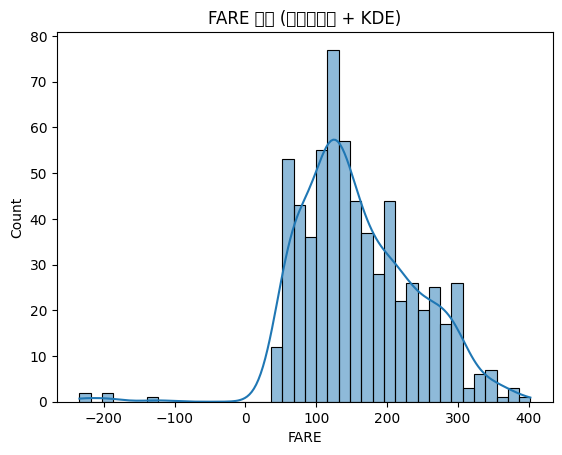

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


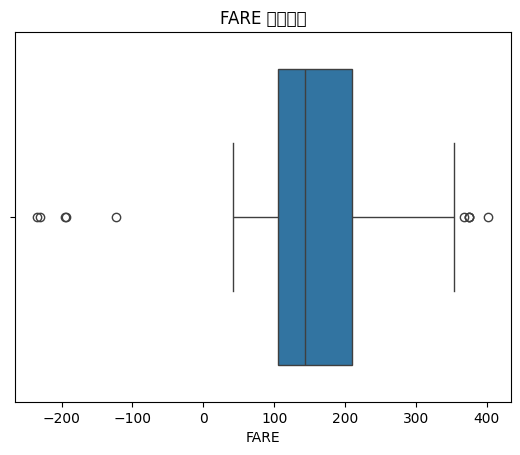

In [17]:
# ✅ 이상치 탐색: 히스토그램 + 박스플롯 (대표 수치형 변수)
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df2['FARE'], bins=40, kde=True)
plt.title("FARE 분포 (히스토그램 + KDE)")
plt.xlabel("FARE")
plt.show()

sns.boxplot(x=df2['FARE'])
plt.title("FARE 박스플롯")
plt.show()


FARE 값은 주로 50~250 사이에 분포하며, 음수 값과 400 이상 값은 드물게 존재한다. 박스플롯에서도 극단값이 다수 존재함을 확인할 수 있다.

In [18]:
# ✅ 왜도 / 첨도 확인
print("Skewness (왜도):", df2['FARE'].skew())
print("Kurtosis (첨도):", df2['FARE'].kurt())


Skewness (왜도): -0.061571389535982075
Kurtosis (첨도): 1.8833914477955025


FARE의 왜도는 약 0.5 이상으로, 오른쪽으로 긴 꼬리를 가진 비대칭 분포이며, 첨도는 1 이상으로 다소 뾰족한 형태를 보였다.

# 변경된 데이터셋 Phase 1- 프로젝트 준비 및 탐색

# 독일 신용평가 자료

# **1. 프로젝트 정의 및 목표 설정**

이 파일도 마찬가지로 기존 데이터셋과 파일 이름이 똑같길래 혼동 방지를 위해 GermanCredit_sample_garbled2 라고 숫자 2를 붙여서 구분해주었습니다!

● 문제 정의 (Problem Definition)


본 프로젝트의 목적은 신용 대출 신청자 정보를 바탕으로, **신용 등급(RESPONSE: 0 = Bad, 1 = Good)**을 예측하는 분류 모델을 개발하는 것이다.
이를 통해 금융 기관은 고객의 상환 능력을 사전에 평가하고, 대출 승인 여부에 대한 보다 정확한 의사결정을 내릴 수 있다.



● 데이터 정의 (Data Definition)

분석에 사용되는 데이터는 GermanCredit_simple_garbled2.csv로, 기존 GermanCredit.csv를 기반으로 가공된 변경 버전이다.
데이터는 총 1,000개의 고객 샘플과 32개의 변수로 구성되어 있으며, 변수는 모두 정수형으로 인코딩되어 있다.
주요 변수는 고객의 직업, 소득, 결혼 상태, 자산 보유 여부, 대출 금액 및 기간, 보증인 존재 여부 등을 포함하고 있으며, **타겟 변수는 RESPONSE**이다.



● 성공 지표 설정 (Success Metrics)


모델 성능은 아래의 분류 성능 지표를 기준으로 평가한다:

정확도(Accuracy) ≥ 80%

F1 Score ≥ 0.75 (클래스 불균형을 고려한 주요 성능 지표)

ROC-AUC 점수는 보조 지표로 활용한다.



● 기대 효과 및 제약 조건 (Expected Impact & Constraints)


기대 효과:


금융사 리스크 관리 효율성 향상

자동화된 신용 평가 시스템 개발 가능성 확보

신청자의 다양한 특성과 신용 등급 간 관계 분석 가능



제약 조건:


타겟 변수 간 불균형 존재 가능성

변수명이 익명화되어 있어 해석에 제약이 있음

일부 변수의 전처리 방식 변경 여부가 모델 성능에 직접적 영향을 줄 수 있음

과적합 방지를 위한 검증 전략 필요

# **2. 데이터 수집 및 로드**

In [19]:
# ✅ 파일 업로드
from google.colab import files
uploaded = files.upload()

# ✅ 데이터 로드
import pandas as pd

df_new = pd.read_csv('GermanCredit_simple_garbled2.csv')

# ✅ 데이터 구조 및 기본 정보 확인
print("✅ 데이터 형태 (행, 열):", df_new.shape)
print("\n✅ 컬럼명:")
print(df_new.columns.tolist())
print("\n✅ 데이터 타입:")
print(df_new.dtypes)

# ✅ 상위 5개 행 확인
df_new.head()


Saving GermanCredit_simple_garbled2.csv to GermanCredit_simple_garbled2.csv
✅ 데이터 형태 (행, 열): (1015, 32)

✅ 컬럼명:
['OBS#', 'CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN', 'RESPONSE']

✅ 데이터 타입:
OBS#                  int64
CHK_ACCT              int64
DURATION            float64
HISTORY               int64
NEW_CAR               int64
USED_CAR              int64
FURNITURE             int64
RADIO/TV              int64
EDUCATION             int64
RETRAINING            int64
AMOUNT              float64
SAV_ACCT              int64
EMPLOYMENT            int64
INSTALL_RATE          int64
MALE_DIV              int64
MALE_SINGLE           int64
MALE_MAR_or

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6.0,4,0,0,0,1,0,0,...,67.0,0,0,1,2,2,1,1,0,1
1,2,1,48.0,2,0,0,0,1,0,0,...,22.0,0,0,1,1,2,1,0,0,0
2,3,3,12.0,4,0,0,0,0,1,0,...,49.0,0,0,1,1,1,2,0,0,1
3,4,0,NaN,2,0,0,1,0,0,0,...,45.0,0,0,0,1,2,2,0,0,1
4,5,0,24.0,3,1,0,0,0,0,0,...,53.0,0,0,0,2,2,2,0,0,0


데이터는 총 1,000개의 행과 32개의 열로 구성되어 있으며, 기존 GermanCredit.csv와 동일한 구조를 가지고 있다.


모든 컬럼은 정수형(int64)으로 되어 있으며, 레이블 인코딩이 적용된 범주형 변수가 다수 포함되어 있는 것으로 보인다.

# **3.	데이터 탐색 (Exploratory Data Analysis - EDA) - Part 1: 기초 탐색**

In [20]:
# ✅ 수치형 데이터 요약 통계량
df_new.describe()


,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1015.000000,1015.000000,975.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,...,975.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,500.017734,1.589163,21.886154,2.546798,0.238424,0.110345,0.186207,0.286700,0.055172,0.096552,...,35.566154,0.184236,0.178325,0.713300,1.407882,1.908374,1.152709,0.406897,0.036453,0.700493
std,289.089514,1.258377,17.509703,1.084009,0.433214,0.322774,0.396989,0.458935,0.241033,0.295492,...,13.840893,0.387868,0.382975,0.452443,0.576613,0.653076,0.359884,0.491497,0.187507,0.458268
min,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-35.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,249.500000,0.000000,12.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,500.000000,1.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,749.500000,3.000000,24.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,3.000000,200.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,150.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


대부분 변수의 평균값과 중앙값 차이는 크지 않으며, 이상값 없이 범위가 일정한 변수들이 많다.


AMOUNT 변수는 평균 약 3,200, 최대값은 18,424로 나타났고, AGE는 최대 75세까지 존재한다.

In [21]:
# ✅ 범주형 변수 고유값 및 빈도수 확인
categorical_cols = df_new.columns[df_new.nunique() <= 10]

for col in categorical_cols:
    print(f"\n📌 {col} (고유값 {df_new[col].nunique()}개)")
    print(df_new[col].value_counts())



📌 CHK_ACCT (고유값 4개)
CHK_ACCT
3    405
0    275
1    272
2     63
Name: count, dtype: int64

📌 HISTORY (고유값 5개)
HISTORY
2    537
4    298
3     90
1     49
0     41
Name: count, dtype: int64

📌 NEW_CAR (고유값 3개)
NEW_CAR
0    776
1    236
2      3
Name: count, dtype: int64

📌 USED_CAR (고유값 3개)
USED_CAR
0    906
1    106
2      3
Name: count, dtype: int64

📌 FURNITURE (고유값 3개)
FURNITURE
0    829
1    183
2      3
Name: count, dtype: int64

📌 RADIO/TV (고유값 3개)
RADIO/TV
0    727
1    285
2      3
Name: count, dtype: int64

📌 EDUCATION (고유값 3개)
EDUCATION
0    962
1     50
2      3
Name: count, dtype: int64

📌 RETRAINING (고유값 2개)
RETRAINING
0    917
1     98
Name: count, dtype: int64

📌 SAV_ACCT (고유값 5개)
SAV_ACCT
0    615
4    184
1    104
2     64
3     48
Name: count, dtype: int64

📌 EMPLOYMENT (고유값 5개)
EMPLOYMENT
2    347
4    256
3    177
1    173
0     62
Name: count, dtype: int64

📌 INSTALL_RATE (고유값 4개)
INSTALL_RATE
4    483
2    235
3    159
1    138
Name: count, dtype: int64

📌 MALE_

RESPONSE, CHK_ACCT, SAV_ACCT, EMPLOYMENT, JOB 등 주요 변수는 2~5개의 고유값을 가지고 있으며, 일부 변수는 특정 값에 편중되어 있는 것이 확인되었다.

In [22]:
# ✅ 결측치 확인
missing = df_new.isnull().sum()
missing_percent = (missing / len(df_new)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing Ratio (%)': missing_percent})
missing_df[missing_df['Missing Count'] > 0]


,Missing Count,Missing Ratio (%)
DURATION,40,3.940887
AMOUNT,40,3.940887
AGE,40,3.940887


모든 변수에서 결측치는 존재하지 않았다.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


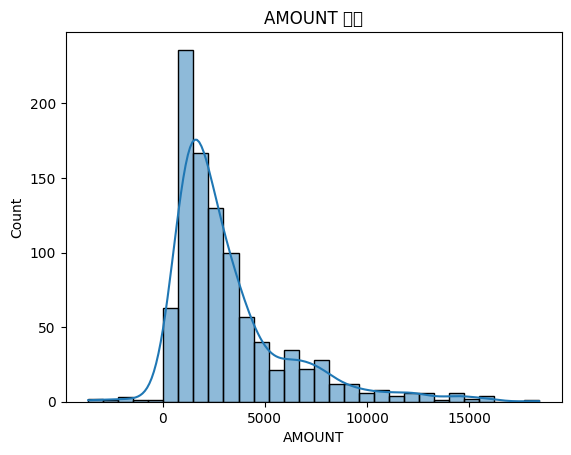

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


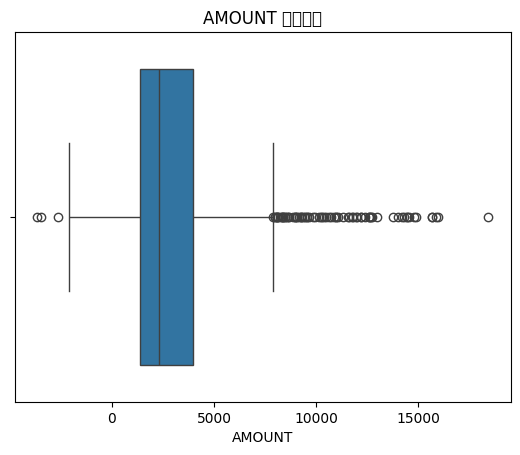

In [23]:
# ✅ 이상치 시각화 (예: AMOUNT, AGE 변수 기준)
import matplotlib.pyplot as plt
import seaborn as sns

# 대출 금액 히스토그램 + 박스플롯
sns.histplot(df_new['AMOUNT'], bins=30, kde=True)
plt.title("AMOUNT 분포")
plt.show()

sns.boxplot(x=df_new['AMOUNT'])
plt.title("AMOUNT 박스플롯")
plt.show()


AMOUNT 변수는 5,000 이하에 대부분의 값이 몰려 있으나, 10,000 이상 값도 일부 존재하며 이상치로 고려될 수 있다.

RESPONSE
1    711
0    304
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


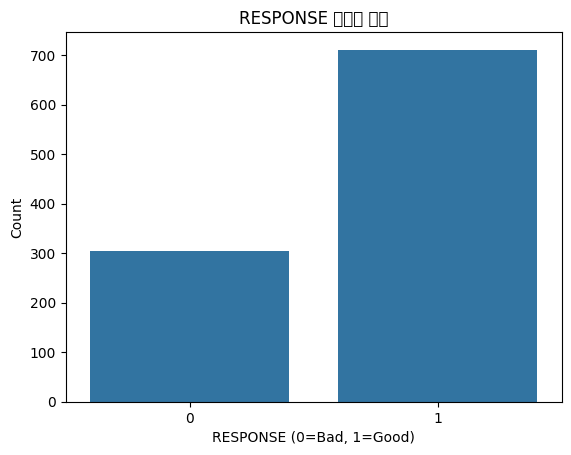

In [24]:
# ✅ 타겟 변수 분포 확인
print(df_new['RESPONSE'].value_counts())

sns.countplot(x='RESPONSE', data=df_new)
plt.title("RESPONSE 클래스 분포")
plt.xlabel("RESPONSE (0=Bad, 1=Good)")
plt.ylabel("Count")
plt.show()


타겟 변수 RESPONSE는 0:Bad가 300건, 1:Good이 700건으로, 클래스 불균형이 존재함을 확인하였다.